# Continuación de programa para resolver ecuaciones diferenciales

## Las integrales de picard

Es una ecuación exacta que describe la iteración n+1-ésima de la solución a una ecuación diferencial:

$$
y_{n+1}=y_n+\int \limits_a^b f(x,y) dx  \ \ \ \ \ \ \dots (1)
$$

Pero aquí hay un problema... no podemos asegurar que el método conocido que tenemos para resolver integrales va a ser convergente en la función $f(x,y)$.

### Breviario sobre las integrales y sus deficiencias

La forma en la que está definida la integral requiere de un proceso convergente que nos asegure que el área de los  rectángulos aproximándose a la gráfica tiende a cero.

A continuación un contraejemplo para el método que conocemos de integración :(

![title](pi.png)

# Deducción de Runge Kutta

Vamos a hacer una expansión en serie de Taylor para la función $f$ como:

$$
f(x)=f(x_0)+f'(x_0)x+\frac{f''(x_0)}{2}x^2+ \dots  \ \ \ \ \ x \in [0,h]
$$

Y vamos a sustituir en la ecuación (1) la función f, pero vamos a integrar sobre intervalos simétricos para que se anulen los términos pares y la expansión la vamos a hacer en el punto medio de mi intervalo $x_n$ a $x_{n+1}$:

$$
y_{n+1}=y_n+hf(x_{n+0.5},y_{n+0.5}) + f'(x_0) \int \limits_{-h/2}^{h/2} x dx + \int \limits_{-h/2}^{h/2} x dx O(h^3)  \ \ \ \ \ \ \ \dots (2)
$$

Donde $x_{n+1/2}=\frac{x_{n+1}+x_n}{2}$ y $h=x_{n+1}-x_n$


Ahora el programa va a necesitar saber quien es $y_{n+0.5}$:

$$
y_{n+0.5}=y_n+\frac{h}{2}f(x_n,y_n)
$$

Por lo tanto, la ec. (2) se convierte en:

$$
y_{n+1}=y_n+hf(x_n+\frac{h}{2},y_n+\frac{h}{2}f(x_n,y_n))
$$

Definiendo a $k=hf(x_n,y_n)$

$$
y_{n+1}=y_n+hf(x_n+\frac{h}{2},y_n+\frac{k}{2})
$$

In [16]:
from pylab import*
%matplotlib inline

In [20]:
def runge_kutta(ec,pto,x,h=0.01):
    tiempos = arange(x[0],x[1]+h,h)
    sol=zeros((len(tiempos),len(pto)))
    sol[0,:]=pto
    for i in xrange(len(tiempos)-1):
        k=h*ec(sol[i,:],tiempos[i])
        f=ec(sol[i,:]+0.5*k,tiempos[i]+0.5*h)
        sol[i+1,:]=sol[i,:]+h*f
    return tiempos, sol

In [23]:
def p(y,t):
    return array([y[1],-2*y[1]-0.5*sin(y[0])+cos(t)])


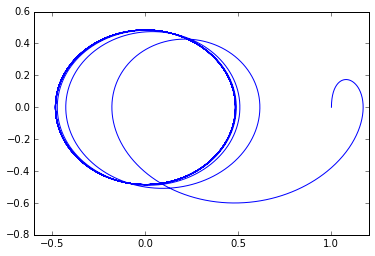

In [24]:
t,y = runge_kutta(p,[1,0],[0,100],0.01)
plot(y[:,0],y[:,1])